PROBLEM 1

- Load and display the original image in color.
- Find the center coordinates of the image, print the pixel intensity at the center.
- Draw colored rectangle patch center at that point (40x30 pixels).
- Print the intensity value at the center of the patch.
- Display the new image with the added patch.

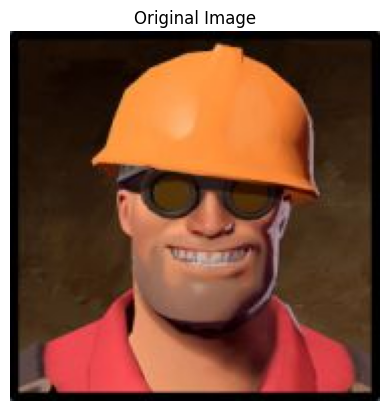

Image center (y, x): (92, 92)
Pixel value at center (BGR): [ 67  92 172]
Pixel value at center after patch (BGR): [168 158  50]


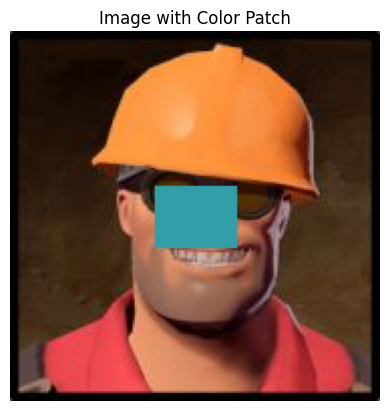

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

img = cv2.imread("tf2_engineer.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

yc, xc = img.shape[0] // 2, img.shape[1] // 2
print(f"Image center (y, x): ({yc}, {xc})")
print("Pixel value at center (BGR):", img[yc, xc])

patch_color_hex = '#329ea8'
patch_color_bgr = tuple(int(patch_color_hex.lstrip('#')[i:i+2], 16) for i in (4, 2, 0))
cv2.rectangle(img, (xc-20, yc-15), (xc+20, yc+15), patch_color_bgr, -1)

print("Pixel value at center after patch (BGR):", img[yc, xc])

patched_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(patched_rgb)
plt.title("Image with Color Patch")
plt.axis("off")
plt.show()

PROBLEM 2

The negative of the einstein.tiff image is created and the values ​​of 5 randomly selected pixels are compared.

- Load and display the original image in grayscale.
- Create negative version of the grayscale image.
- Display negative image.
- Pick 5 random pixels from the original image and compare their intensity values with the same pixels in negative image.

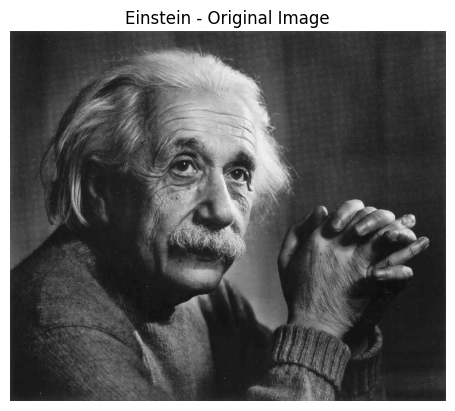

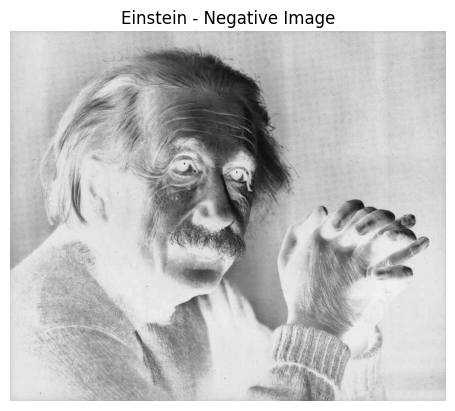


📌 Piksel Karşılaştırmaları (Orijinal vs Negative):
Pixel (405, 89): Orijinal = 106, Negative = 149
Pixel (257, 709): Orijinal = 102, Negative = 153
Pixel (259, 9): Orijinal = 104, Negative = 151
Pixel (427, 617): Orijinal = 133, Negative = 122
Pixel (655, 67): Orijinal = 98, Negative = 157


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

einstein_gray = cv2.imread("einstein.tif", cv2.IMREAD_GRAYSCALE)

if einstein_gray is None:
    print("ERROR: Can't find image file. Check file name or file way.")
else:
    # Orijinal görüntüyü göster
    plt.imshow(einstein_gray, cmap='gray')
    plt.title("Einstein - Original Image")
    plt.axis("off")
    plt.show()


    einstein_negatif = 255 - einstein_gray

    
    plt.imshow(einstein_negatif, cmap='gray')
    plt.title("Einstein - Negative Image")
    plt.axis("off")
    plt.show()

    # Görüntü boyutlarını al
    y_max, x_max = einstein_gray.shape

    # 5 rastgele piksel koordinatı seç
    rastgele_pikseller = [(random.randint(0, y_max - 1), random.randint(0, x_max - 1)) for _ in range(5)]

    print("\n📌 Piksel Karşılaştırmaları (Orijinal vs Negative):")
    for y_konum, x_konum in rastgele_pikseller:
        deger_orijinal = einstein_gray[y_konum, x_konum]
        deger_negatif = einstein_negatif[y_konum, x_konum]
        print(f"Pixel ({y_konum}, {x_konum}): Orijinal = {deger_orijinal}, Negative = {deger_negatif}")



PROBLEM 3

Log and inverse log transformations will be applied to the pout.tiff image.

- Load and display the original image in grayscale.
- Apply the log transform to the image and display the result.
- Apply inverse log transform to the original image and display the result.
- Apply inverse log transform to the log-transformed image and display the result.
- Compare the results and comment on the visual differences.

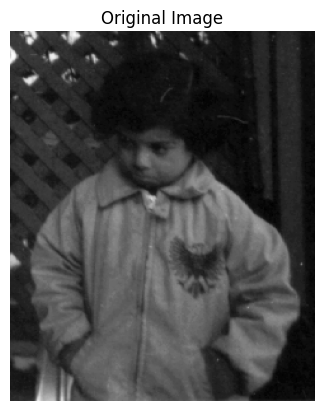

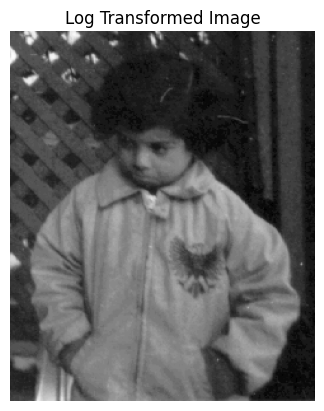

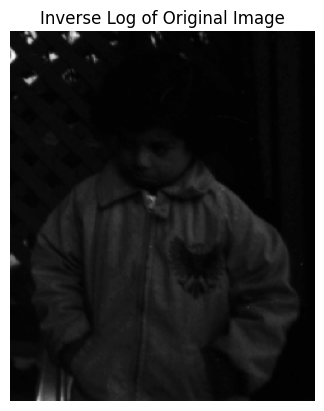

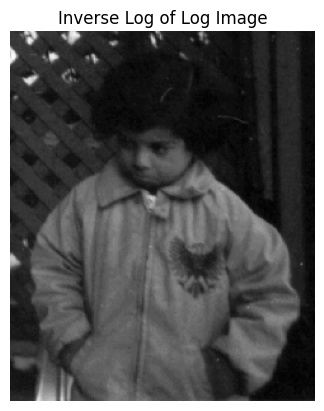

✔ Log transformation enhances visibility in darker regions of the image.
✔ Applying log and then inverse log approximates the original image well.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

input_image = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)

if input_image is None:
    print("ERROR: Image file not found.")
else:

    plt.imshow(input_image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    
    image_float = input_image.astype(np.float32)
    log_constant = 255 / np.log(1 + np.max(image_float))
    log_transformed = log_constant * np.log(1 + image_float)
    log_transformed = np.uint8(np.clip(log_transformed, 0, 255))

    plt.imshow(log_transformed, cmap='gray')
    plt.title("Log Transformed Image")
    plt.axis('off')
    plt.show()


    inverse_log_from_original = np.exp(image_float / log_constant) - 1
    inverse_log_from_original = np.uint8(np.clip(inverse_log_from_original, 0, 255))

    plt.imshow(inverse_log_from_original, cmap='gray')
    plt.title("Inverse Log of Original Image")
    plt.axis('off')
    plt.show()


    log_as_float = log_transformed.astype(np.float32)
    inverse_log_from_log = np.exp(log_as_float / log_constant) - 1
    inverse_log_from_log = np.uint8(np.clip(inverse_log_from_log, 0, 255))

    plt.imshow(inverse_log_from_log, cmap='gray')
    plt.title("Inverse Log of Log Image")
    plt.axis('off')
    plt.show()

    print("✔ Log transformation enhances visibility in darker regions of the image.")
    print("✔ Applying log and then inverse log approximates the original image well.")


PROBLEM 4

Applying spatial and frequency domain sharpening to moon.tiff image.

- Load and display the original image in grayscale.
- Apply unsharp masking in the spatial domain using 3 different k values.
- Apply unsharp masking in the frequency domain using the same k values and a selected cutoff frequency D₀.
- Display and compare results from both domains for each k side-by-side.

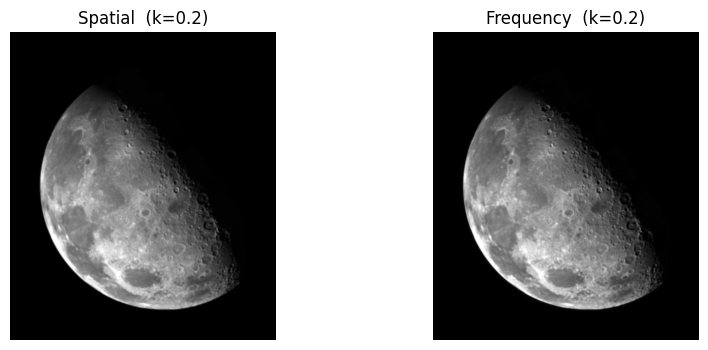

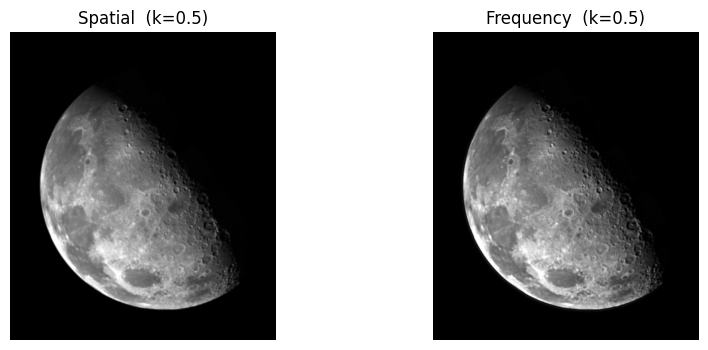

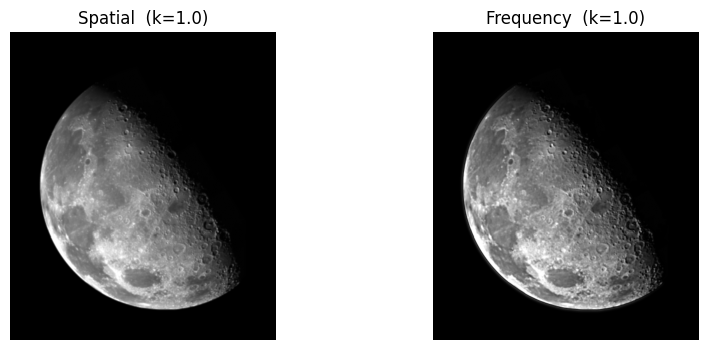

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random


def unsharp_mask_spatial(img, k):
    blur = cv2.GaussianBlur(img, (5,5), 0)
    mask = cv2.subtract(img, blur)
    sharp = cv2.addWeighted(img, 1.0, mask, k, 0)
    return sharp

def unsharp_mask_frequency(img, k, D0=30):
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = img.shape
    u, v = np.meshgrid(np.arange(cols), np.arange(rows))
    D = np.sqrt((u - cols/2)**2 + (v - rows/2)**2)
    H = 1 - np.exp(-(D**2) / (2*(D0**2)))

    G = (1 + k * H) * dft_shift
    g = np.abs(np.fft.ifft2(np.fft.ifftshift(G)))
    return np.uint8(np.clip(g, 0, 255))

img = cv2.imread("moon.tif", cv2.IMREAD_GRAYSCALE)
k_values = [0.2, 0.5, 1.0]

for k in k_values:
    sharp_spatial = unsharp_mask_spatial(img, k)
    sharp_freq = unsharp_mask_frequency(img, k)
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].imshow(sharp_spatial, cmap='gray')
    axs[0].set_title(f'Spatial  (k={k})')
    axs[0].axis("off")
    
    axs[1].imshow(sharp_freq, cmap='gray')
    axs[1].set_title(f'Frequency  (k={k})')
    axs[1].axis("off")
    
    plt.show()

if img is None:
    print("ERROR: 'moon.tif' file can't find or can't open.")


PROBLEM 5

- Load and display the original image in grayscale.
- Identify the type of noise present using visual observation and histogram analysis.
- Apply appropriate filtering (e.g., median filter) to reduce or remove the noise effectively.

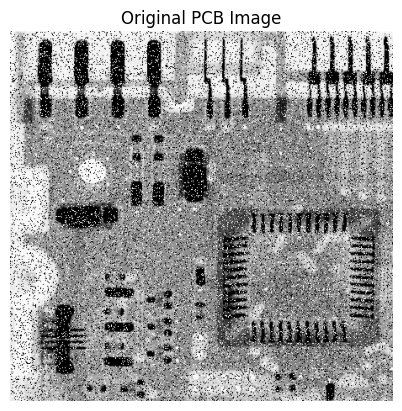

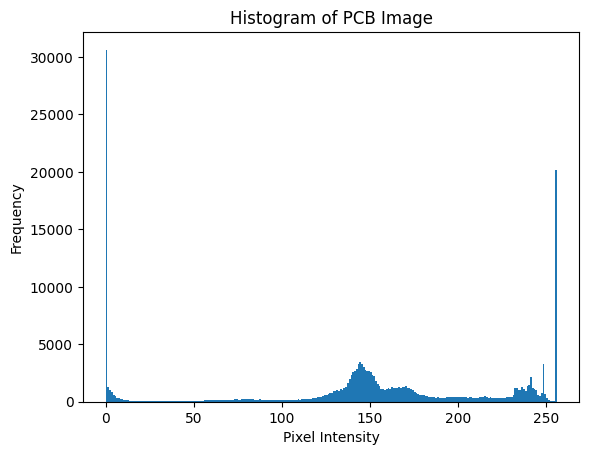

The type of noise can be analyzed based on image structure and histogram distribution.


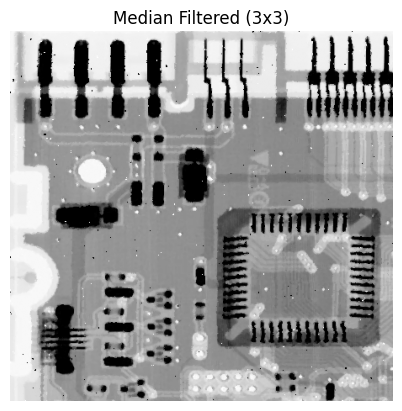

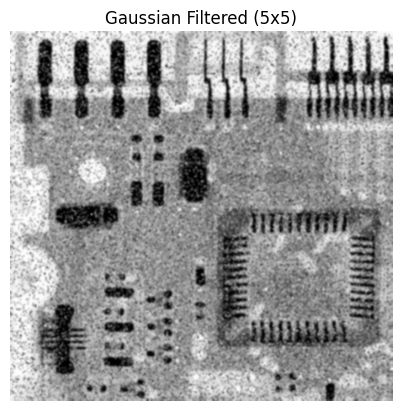

✔ Median filtering is effective for salt-and-pepper noise.
✔ Gaussian filtering helps reduce Gaussian or random noise.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# PCB görüntüsünü gri tonlamalı olarak oku
pcb_gray = cv2.imread("pcb.tif", cv2.IMREAD_GRAYSCALE)

if pcb_gray is None:
    print("ERROR: Can't find image file.")
else:
    # Orijinal görüntüyü göster
    plt.imshow(pcb_gray, cmap='gray')
    plt.title("Original PCB Image")
    plt.axis('off')
    plt.show()

    # Histogramı göster
    plt.hist(pcb_gray.ravel(), bins=256, range=(0, 256))
    plt.title("Histogram of PCB Image")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

    print("The type of noise can be analyzed based on image structure and histogram distribution.")

    # Medyan filtre uygula
    pcb_median = cv2.medianBlur(pcb_gray, 3)
    plt.imshow(pcb_median, cmap='gray')
    plt.title("Median Filtered (3x3)")
    plt.axis('off')
    plt.show()

    # Gauss filtresi uygula
    pcb_gaussian = cv2.GaussianBlur(pcb_gray, (5, 5), 0)
    plt.imshow(pcb_gaussian, cmap='gray')
    plt.title("Gaussian Filtered (5x5)")
    plt.axis('off')
    plt.show()

    print("✔ Median filtering is effective for salt-and-pepper noise.")
    print("✔ Gaussian filtering helps reduce Gaussian or random noise.")



PROBLEM 6

- Load and display the original image in grayscale.
- Analyze and explain the main problem in the image using visual and statistical evidence.
- Apply two different enhancement approaches discussed in class to solve problem.
- Display  results of both approaches.
- Make sure the effectiveness of each solution using visual and numerical comparisons.

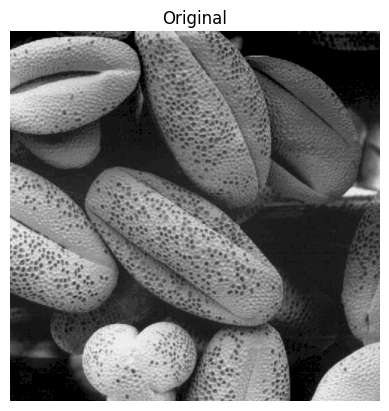

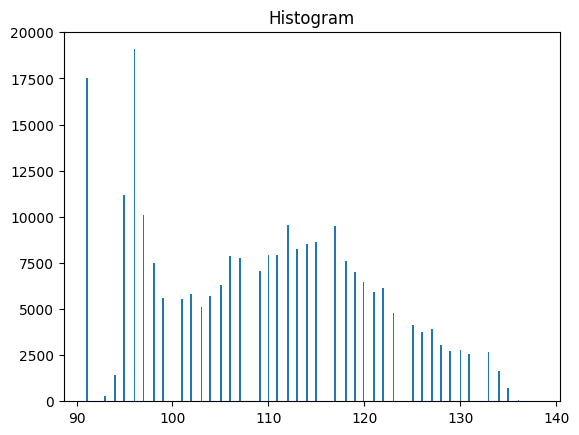

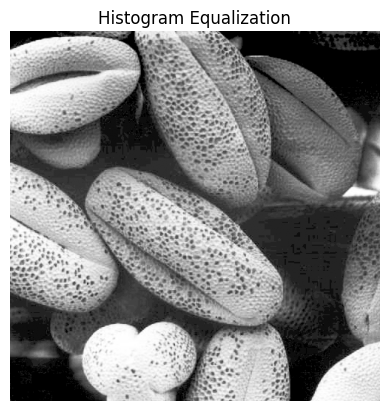

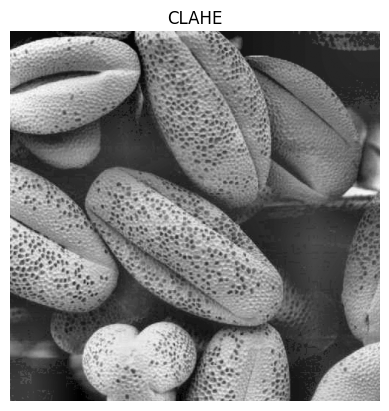

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("pollen (1).tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.show()

# Histogram to diagnose
plt.hist(img.ravel(), bins=256)
plt.title("Histogram")
plt.show()

# Method 1: Histogram Equalization
equalized = cv2.equalizeHist(img)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalization")
plt.axis("off")
plt.show()

# Method 2: CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(img)
plt.imshow(clahe_img, cmap='gray')
plt.title("CLAHE")
plt.axis("off")
plt.show()
